####

#### Project 5 - Neural Networks for Character Recognition

In [12]:
using PyPlot, Random, LinearAlgebra, Optim   # Packages needed
Random.seed!(1234);

In [13]:

charstr = """
          OOOOOO  OOOOOO  OOOOOO  OO..OO
          OOOOOO  OOOOOO  OOOOOO  OO..OO
          O.OO.O  OO..OO  ..OO..  OO..OO
          O.OO.O  OO..OO  ..OO..  OOOOOO
          O....O  OOOOOO  ..OO..  OO..OO
          O....O  OO..OO  ..OO..  OO..OO
          O... O  OO..OO  ..OO..  OO..OO
          """

training = reshape(collect(charstr), :, 7)
training = Int.(training[[1:6;9:14;17:22;25:30],:] .== 'O')
training = reshape(training', 7*6, 4)
target = [0 0; 0 1; 1 0; 1 1]'
mapstr = "MATH";

function plot_chars(images)
    gray()
    n_images = size(images,2)
    for j = 1:n_images
        subplot(ceil(Int, n_images/4), 4, j)
        im = 1 .- reshape(images[:,j], 7, 6)
        imshow(im); axis("off");
    end
end

plot_chars (generic function with 1 method)

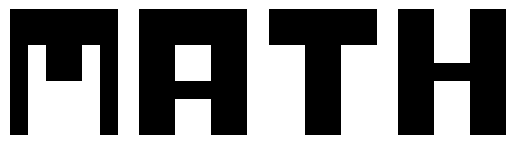

In [14]:
plot_chars(training)

In [15]:
function make_testdata(training)
    testdata = [training training training training training]
    for i in 1:4
        for j in 1:4
            p = rand(1:42,i*2)
            testdata[p,j+4*(i)] = abs.(training[p,j].-1)
        end
    end
    return testdata
end

make_testdata (generic function with 1 method)

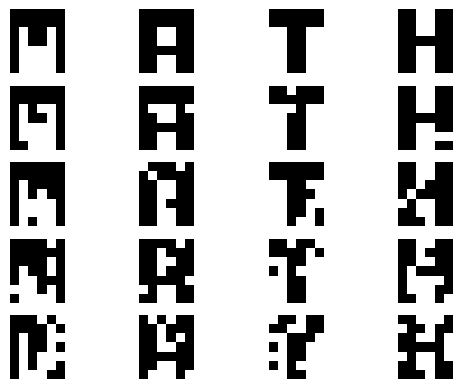

In [16]:
testdata = make_testdata(training);
plot_chars(testdata)

#### Problem 2 - Training using  SGD

In [17]:
function sigmoid_function(x)
    return @. 1/(1+exp(0.5-x))
end

function train_sgd(; maxiter=10000, rate=1)
    V = randn(10,42)
    W = randn(2,10)
    for i in 1:maxiter
        j = rand(1:4)
        k = rand(1:2)
        x = training[:,j]
        r = sigmoid_function(V*x)
        y = sigmoid_function(dot(W[k,:],r))
        q = @. (y - target[k,j])*y*(1-y)
        u = @.  (W[k,:])*r*(1-r)
        E1 = @. q*r'
        E2 = @. q*u*x'
        @. V -= rate*E2
        @. W[k,:] -= rate*E1[:]
    end
    #println("it runs: ", n)
    return V,W
end

train_sgd (generic function with 1 method)

In [18]:
V,W = train_sgd()

([0.32066313437357047 -0.12052150944919832 … 0.428445971507449 -0.35655270196141864; -0.4025632478628491 -2.2510647376480746 … -1.6200602176553134 0.2038939607263329; … ; -0.8542609918263532 -0.909609211772764 … -0.6010534849536997 0.15190034462067764; -1.0571963814417598 1.4694240535013352 … 2.3322936897509496 -2.2557348491402003], [-0.6113820277597177 0.7352528535643402 … -2.149446367471129 -3.7550288245641426; -3.599115553210495 0.36805894923931337 … 0.6191293484196466 0.3772527471011244])

#### Problem 2 - Training using SGD

In [19]:
function predict(testdata, V, W)
    a = []
    for i in 1:20
        y = round.(Int,sigmoid_function(W*sigmoid_function(V*testdata[:,i])))
        if y == [0,0]
            push!(a, "M")
        elseif y == [0,1]
            push!(a, "A")
        elseif y == [1,0]
            push!(a, "T")
        else
            push!(a, "H")
        end
    end
    reshape(a,5,4)
end

predict (generic function with 1 method)

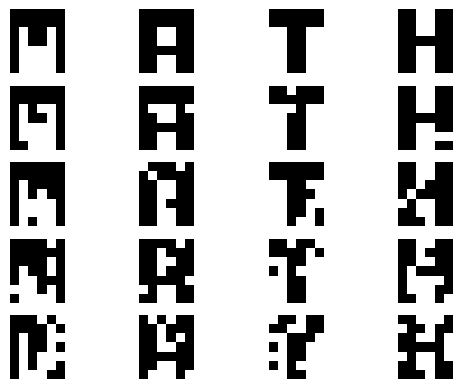

5×4 Matrix{Any}:
 "M"  "A"  "T"  "H"
 "A"  "T"  "H"  "M"
 "T"  "H"  "M"  "T"
 "H"  "M"  "A"  "T"
 "M"  "A"  "T"  "H"

In [20]:
plot_chars(testdata)
predict(testdata, V, W)

#### Problem 4

In [22]:
function Et(A)
    V = reshape(A[1:420],10,42)
    W = reshape(A[421:440],2,10)
    x = 0
    for j in 1:4
            #println(4*(i-1)+j)
        x += 1 ./2 .*norm(sigmoid_function(W*sigmoid_function(V*training[:,j])) -target[:,j]).^2
    end
    return x
end
#optimize(f,training,GradientDescent(); autodiff=:forward)

Et (generic function with 1 method)

In [29]:
function train_optim()
    V = randn(10,42)
    W = randn(2,10)
    A = [V[:] 
        W[:]]
    res = optimize(Et, A, GradientDescent(); autodiff=:forward)
    A = Optim.minimizer(res)
    V = reshape(A[1:420],10,42)
    W = reshape(A[421:440],2,10)
    return V,W
end

train_optim (generic function with 1 method)

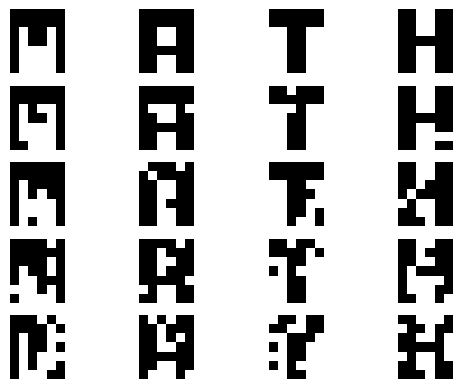

5×4 Matrix{Any}:
 "M"  "A"  "T"  "H"
 "A"  "T"  "H"  "T"
 "T"  "H"  "M"  "H"
 "H"  "M"  "H"  "T"
 "M"  "A"  "T"  "H"

In [30]:
plot_chars(testdata)
V,W = train_optim()
predict(testdata, V, W)